# **OLA - Ensemble Learning**

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Filter out ImportWarning
warnings.filterwarnings("ignore", category=ImportWarning)

**Loading Dataset**

In [2]:
df=pd.read_csv('ola_driver_scaler.csv')
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [3]:
#Getting the shape of the data
df.shape

(19104, 14)

In [4]:
#dropping unnamed column
df.drop('Unnamed: 0',axis=1,inplace=True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


## **Data Preprocessing steps:**

**Transforming Data Type to a Specific Type in Pandas DataFrame**

In [6]:
#converting date-time datatype to date-time
df['MMM-YY']=pd.to_datetime(df['MMM-YY'])
df['Dateofjoining']=pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate']=pd.to_datetime(df['LastWorkingDate'])

**Checking for missing values and Preparing data for KNN Imputation**

In [7]:
#checking for null values
round(df.isnull().sum()/df.shape[1],2)

MMM-YY                     0.00
Driver_ID                  0.00
Age                        4.69
Gender                     4.00
City                       0.00
Education_Level            0.00
Income                     0.00
Dateofjoining              0.00
LastWorkingDate         1345.23
Joining Designation        0.00
Grade                      0.00
Total Business Value       0.00
Quarterly Rating           0.00
dtype: float64

In [8]:
#extracting numerical features
num_cols=df.select_dtypes(np.number)
num_cols.columns

Index(['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [9]:
num_cols.drop('Driver_ID',axis=1,inplace=True)

In [10]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(num_cols)
df_new = imputer.transform(num_cols)

In [11]:
df_new=pd.DataFrame(df_new,columns=num_cols.columns)

In [12]:
df_new.isnull().sum()

Age                     0
Gender                  0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
dtype: int64

In [13]:
#concating the dataframes
other_cols=df.drop(num_cols,axis=1)
new_df=pd.concat([df_new,other_cols],axis=1)
new_df.head()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,MMM-YY,Driver_ID,City,Dateofjoining,LastWorkingDate
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,2019-01-01,1,C23,2018-12-24,NaT
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,2019-02-01,1,C23,2018-12-24,NaT
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,2019-03-01,1,C23,2018-12-24,2019-03-11
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-11-01,2,C7,2020-11-06,NaT
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-12-01,2,C7,2020-11-06,NaT


In [14]:
#Aggregate data in order to remove multiple occurrences of same driver data
grouped_data = df.groupby('Driver_ID').agg({
    'Age': 'max',
    'Gender': 'first',
    'City': 'first',
    'Education_Level': 'last',
    'Income': 'last',
    'Dateofjoining': 'last',
    'LastWorkingDate': 'last',
    'Joining Designation': 'last',
    'Grade': 'last',
    'Total Business Value': 'sum',
    'Quarterly Rating': 'last',
})
# Reset index to make Driver_ID a regular column instead of the index
grouped_data.reset_index(inplace=True)

In [15]:
grouped_data.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,1715580,2
1,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
2,4,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,2,350000,1
3,5,29.0,0.0,C9,0,46368,2019-01-09,2019-03-07,1,1,120360,1
4,6,31.0,1.0,C11,1,78728,2020-07-31,NaT,3,3,1265000,2


In [16]:
grouped_data.shape

(2381, 12)

**Feature Engineering**

i)Creating a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1

In [17]:
first_rating=new_df.groupby('Driver_ID')['Quarterly Rating'].first()
last_rating=new_df.groupby('Driver_ID')['Quarterly Rating'].last()
compare=(last_rating>first_rating).astype(int)
grouped_data['Quarterly Rating Increased']=grouped_data['Driver_ID'].map(compare)

In [18]:
grouped_data['Quarterly Rating Increased'].value_counts()

0    2023
1     358
Name: Quarterly Rating Increased, dtype: int64

ii)Target variable creation: Create a column called target which tells whether the driver has left the company- driver whose last working day is present will have the value 1

In [19]:
grouped_data['Target'] = grouped_data.groupby('Driver_ID')['LastWorkingDate'].transform(lambda x: 0 if x.isnull().any() else 1)


In [20]:
grouped_data['Target'].value_counts()

1    1616
0     765
Name: Target, dtype: int64

iii)Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1

In [21]:
first_income=new_df.groupby('Driver_ID')['Income'].first()
last_income=new_df.groupby('Driver_ID')['Income'].last()
check=(last_income>first_income).astype(int)
grouped_data['Income Increased']=grouped_data['Driver_ID'].map(check)
grouped_data['Income Increased'].value_counts()

0    2338
1      43
Name: Income Increased, dtype: int64

# **EDA-Exploratory data analysis**

In [22]:
grouped_data.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly Rating Increased,Target,Income Increased
count,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000
mean,1397.559009,33.663167,0.410332,1.00756,59334.157077,1.820244,2.096598,4.586742e+06,1.427971,0.150357,0.678706,0.018060
std,806.161628,5.983375,0.491997,0.81629,28383.666384,0.841433,0.941522,9.127115e+06,0.809839,0.357496,0.467071,0.133195
min,1.000000,21.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,0.000000,0.000000,0.000000
25%,695.000000,29.000000,0.000000,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000
50%,1400.000000,33.000000,0.000000,1.00000,55315.000000,2.000000,2.000000,8.176800e+05,1.000000,0.000000,1.000000,0.000000
75%,2100.000000,37.000000,1.000000,2.00000,75986.000000,2.000000,3.000000,4.173650e+06,2.000000,0.000000,1.000000,0.000000
max,2788.000000,58.000000,1.000000,2.00000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000,1.000000,1.000000,1.000000


**Plotting categorical columns against the target variable (churn or not churn).**

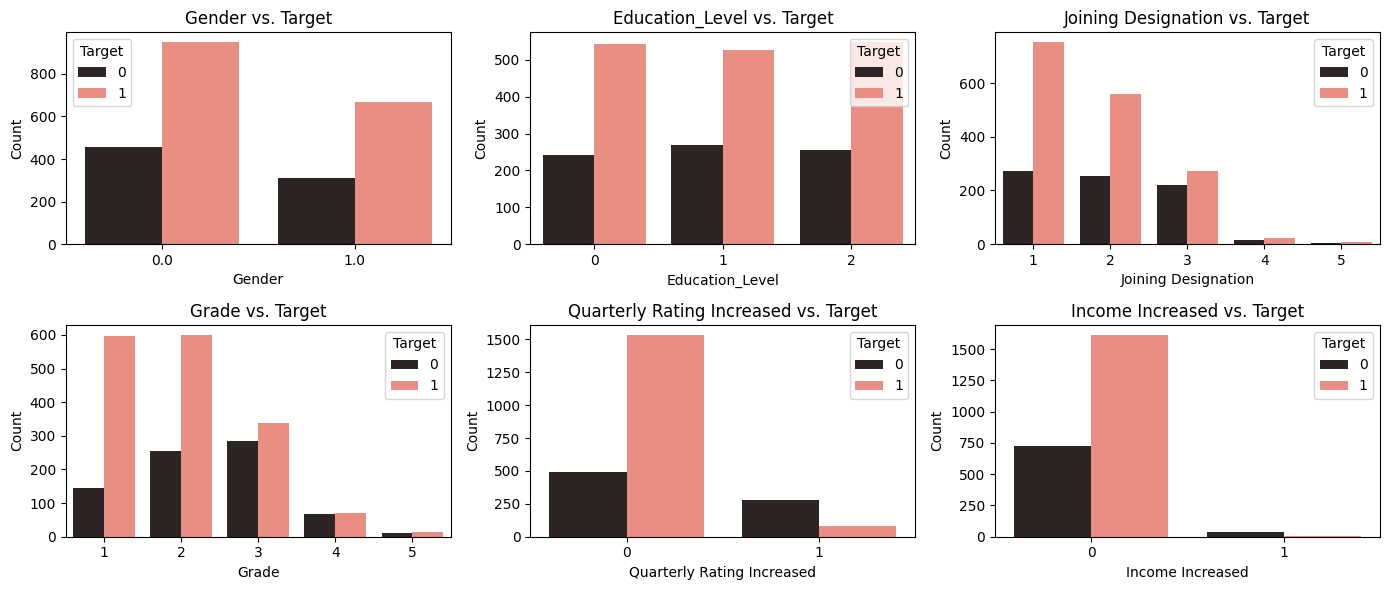

In [39]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical columns and target column
categorical_columns = ['Gender', 'Education_Level', 'Joining Designation', 'Grade', 'Quarterly Rating Increased', 'Income Increased']
target_column = 'Target'

# Determine number of rows needed
num_plots = len(categorical_columns)
num_cols = 3
num_rows = math.ceil(num_plots / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 6))

# Flatten the axes array to iterate over them properly
axes = axes.flatten()

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    # Create a bar plot
    sns.countplot(x=column, hue=target_column, data=grouped_data, palette='dark:salmon', ax=axes[i])
    axes[i].set_title(f'{column} vs. {target_column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

    # Check if legend exists for the current plot
    handles, labels = axes[i].get_legend_handles_labels()
    if handles:
        axes[i].legend(title=target_column)

plt.tight_layout()
plt.show()

**Insights from the plots:**

**1)Gender:**
      -The countplot indicates that males have a higher churn rate compared to females.

**2)Education Level:**
     -Regarding education levels, there appears to be no significant difference in churn rates among different education levels. Whether it's 10+, 12+, or graduate, the churn rates seem to be relatively equal.

**3)Joining Designations:**
     -Joining designations 1, 2, and 3 show higher churn rates, suggesting that employees with these designations are more likely to leave.

**4)Grades:**
     -When examining grades, employees with grades 1, 2, and 3 tend to have higher churn rates, while grades 4 and 5 have relatively lower churn rates, indicating a potential correlation between lower grades and higher churn.

**5)Quarterly Rating Increased:**
     -Quarterly rating changes provide insight into churn rates. Employees with increased ratings (1) tend to have lower churn rates, while those with unchanged ratings (0) exhibit higher churn rates. This suggests that positive changes in quarterly ratings may be associated with lower churn rates.

**6)Income Increased:**
     -Employees whose income increased show lower churn rates, whereas those whose income remained unchanged exhibit higher churn rates.




**Plotting numerical columns against the target variable (churn or not churn)**

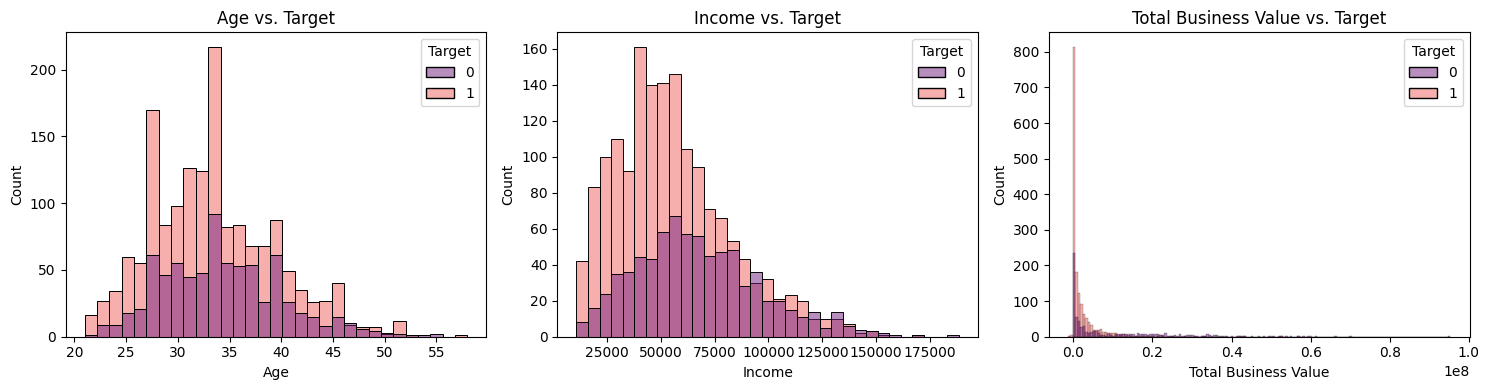

In [23]:
# Plotting numerical columns against the target column
numerical_columns = ['Age', 'Income', 'Total Business Value']
target_column = 'Target'

plt.figure(figsize=(15, 4))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=grouped_data, x=column, hue=target_column, palette='magma')
    plt.title(f'{column} vs. {target_column}')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Insights from the plots:**

1. **Age:**
    - There appears to be a higher churn rate among younger drivers (age group 20-30).
    - Older drivers (age group 50+) have a relatively lower churn rate.

2. **Income:**
    - Drivers with lower income (below 25k) have a higher churn rate.
    - Drivers with higher income (above 50k) have a lower churn rate.

3. **Total Business Value:**
    - Drivers with lower total business value (below 200k) have a higher churn rate.
    - Drivers with higher total business value (above 400k) have a lower churn rate.

In [24]:
#dropping unnecessary columns
grouped_data.drop(['Driver_ID','Dateofjoining','LastWorkingDate'],axis=1,inplace=True)

**Correlation between independent variables**

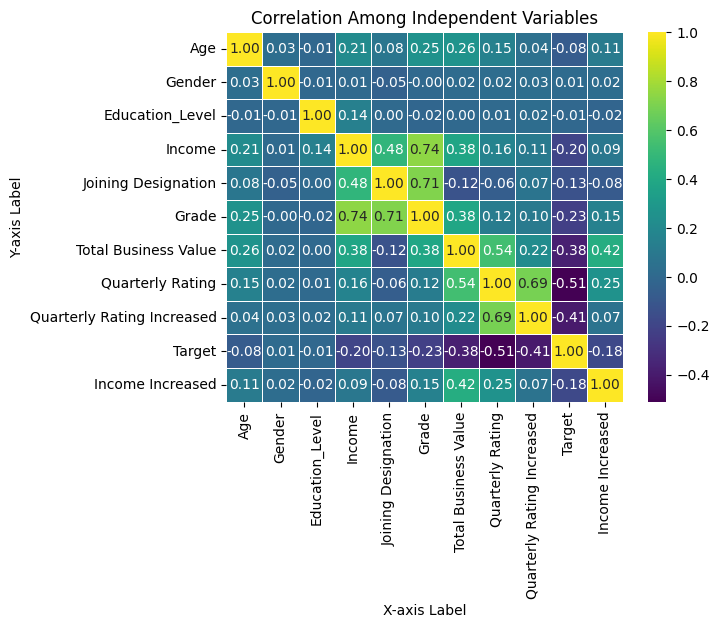

In [25]:
sns.heatmap(data=grouped_data.corr(numeric_only=True), cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
# Add labels and title
plt.title('Correlation Among Independent Variables')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# Show the plot
plt.show()

--There is a strong correlation between the "Grade" and "Income" variables.

--The "Joining Designation" and "Grade" exhibit a significant level of correlation.

--"Total Business Value" and "Income" are positively correlated

**ONE HOT ENCODING**

In [26]:
grouped_data = pd.get_dummies(grouped_data, columns=['City'])
grouped_data.head()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly Rating Increased,Target,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,28.0,0.0,2,57387,1,1,1715580,2,0,1,...,0,0,0,0,0,0,0,0,0,0
1,31.0,0.0,2,67016,2,2,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,43.0,0.0,2,65603,2,2,350000,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,29.0,0.0,0,46368,1,1,120360,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,31.0,1.0,1,78728,3,3,1265000,2,1,0,...,0,0,0,0,0,0,0,0,0,0


# **MODEL BUILDING**

In [27]:
#Extracting dependent and independent columns
X=grouped_data.drop('Target',axis=1)
y=grouped_data['Target']

In [28]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)

X_train shape: (1904, 39)
X_test shape: (477, 39)
y_train shape: (1904,)


**Standardization of training data**

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X_train)

**Class Imbalance Treatment-SMOTE Technique**

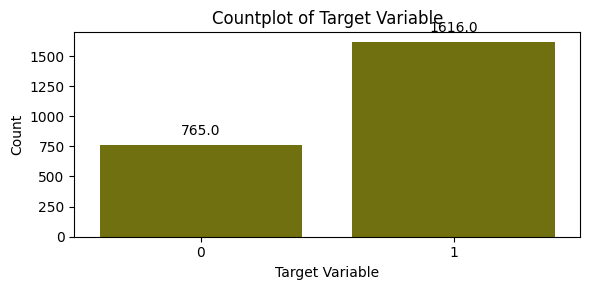

In [30]:
#checking whether target variable is balanced or not
plt.figure(figsize=(6,3))
ax = sns.countplot(x='Target',data=grouped_data,color='Olive')

# Annotate each bar with the count at the top
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add labels and title
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.title('Countplot of Target Variable')
plt.tight_layout()
plt.show()

In [31]:
#Balancing target data using smote technique
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=10)
X_sm,y_sm=smt.fit_resample(X_train,y_train)
X_sm.shape,y_sm.shape

((2596, 39), (2596,))

In [32]:
from collections import Counter
Counter(y_sm)

Counter({1: 1298, 0: 1298})

# **Bagging-Random Forest**

In [33]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_sm,y_sm)
model.score(X_test,y_test)

0.7756813417190775

**Hyperparameter tuning -Grid search cv**

In [55]:
# Defining parameters -
params = {
          'n_estimators' : [100,200,300,400],
          'max_depth' : [3,5,10],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False],
          'max_features' : [8,9,10]
         }

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid = params,
                    scoring = 'f1',
                    verbose=True,
                    cv = 3,
                    n_jobs=-1
                    )


In [90]:
import datetime as dt
start=dt.datetime.now()
grid.fit(X_sm, y_sm)
end=dt.datetime.now()
print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)
print(f"Time taken for fits : {end - start}")

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best params:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'n_estimators': 300}
Best score:  0.8075996806602572
Time taken for fits : 0:02:55.616732


**Classification report and ROC-AUC curve**

              precision    recall  f1-score   support

           0       0.74      0.60      0.67       159
           1       0.82      0.90      0.86       318

    accuracy                           0.80       477
   macro avg       0.78      0.75      0.76       477
weighted avg       0.79      0.80      0.79       477



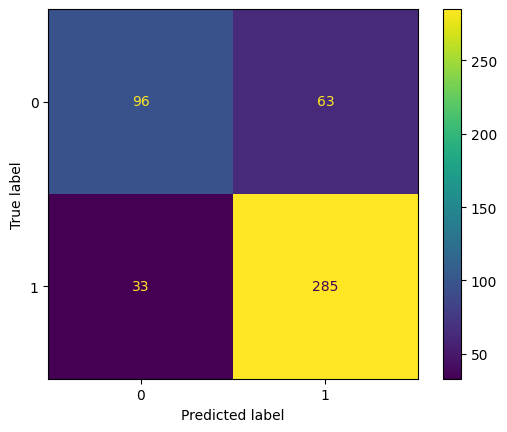

In [68]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_).plot()

From above above classification report using RandomForest classifier we observed

**Precision:**

--For class 0 (non-churn drivers), precision is 0.74, indicating that out of all the instances classified as non-churn, 74% of them are actually non-churn.

--For class 1 (churn drivers), precision is 0.82, indicating that out of all the instances classified as churn, 82% of them are actually churn.

**Recall:**

--For class 0 (non-churn drivers), recall is 0.60, indicating that out of all the actual non-churn instances, 60% of them are correctly classified as non-churn.

--For class 1 (churn drivers), recall is 0.90, indicating that out of all the actual churn instances, 90% of them are correctly classified as churn.

**F1-score:**

--For class 0 (non-churn drivers), the F1-score is 0.67.

--For class 1 (churn drivers), the F1-score is 0.86.

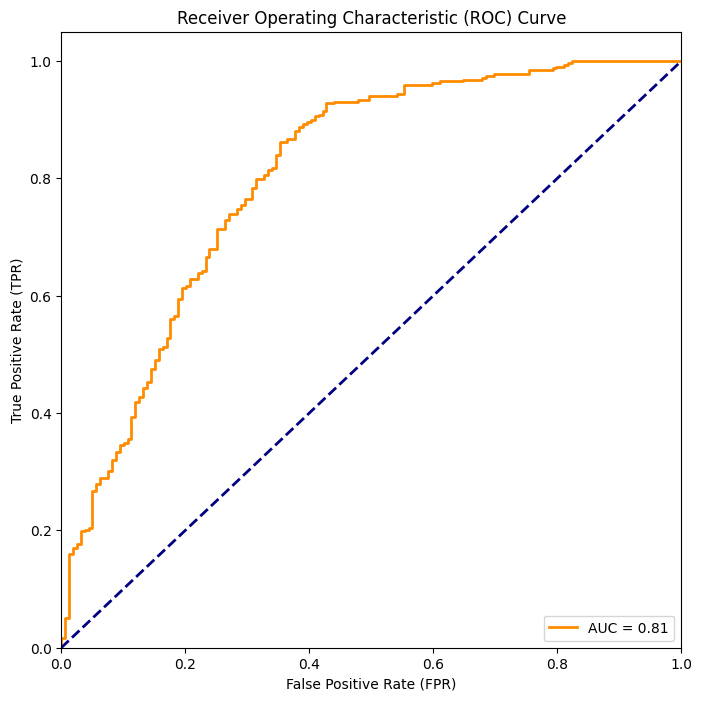

In [91]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Predict probabilities
y_probs = grid.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



**In this case:**

- The AUC score of 0.81 suggests that the model has a high ability to distinguish between churn and non-churn drivers.
- The curve is close to the upper left corner of the plot, indicating a low FPR and a high TPR.
- This means that the model can accurately identify both churn and non-churn drivers with a low rate of misclassification.

**Feature Importance**

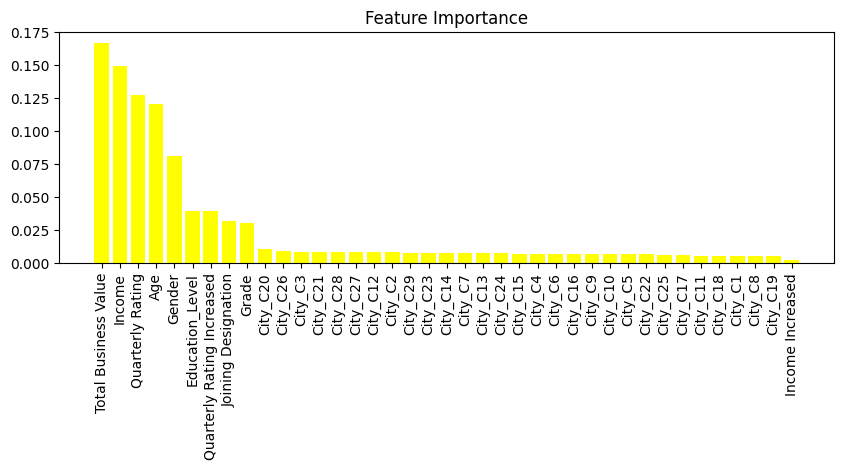

In [83]:
# Feature Importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
clf=RandomForestClassifier(random_state=10, bootstrap=True, criterion='entropy',
                              max_depth=10, max_features=8, n_estimators=300)
clf.fit(X_sm,y_sm)
importances = model.feature_importances_

indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_sm.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.title("Feature Importance") # Create plot title
plt.bar(range(X.shape[1]), importances[indices],color='Yellow') # Add bars
plt.xticks(range(X.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

--so Total Business  value,Income,Quarterly Rating are top3 important features...

# **Gradient Bossting**

In [86]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
import datetime as dt
params = {
    "n_estimators": [50,100,150,200],
    "loss": ["log_loss", "exponential"],
    "max_depth" : [3, 4, 5, 7],
    "max_leaf_nodes" : [20, 40, 80],
    "learning_rate": [0.1, 0.2, 0.3]
}
gbc = GBC()
clf = GridSearchCV(gbc, params, scoring = "f1", cv=3, n_jobs = -1, verbose = 1)

start = dt.datetime.now()
clf.fit(X_sm, y_sm)
end = dt.datetime.now()
print(f"Time taken for fits : {end - start}")

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Time taken for fits : 0:06:32.934691


In [87]:
gbc.fit(X_sm, y_sm)
print("Best params: ", gbc.best_params_)
print("Best score: ", gbc.best_score_)

Best params:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 8, 'n_estimators': 300}
Best score:  0.8075451202187546


**Classification Report-GBDT**

              precision    recall  f1-score   support

           0       0.74      0.62      0.68       159
           1       0.83      0.89      0.86       318

    accuracy                           0.80       477
   macro avg       0.78      0.76      0.77       477
weighted avg       0.80      0.80      0.80       477



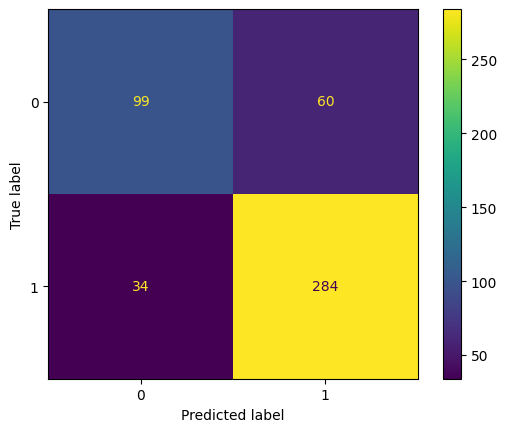

In [89]:
y_pred = gbc.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_).plot()

From above above classification report using GRADIENTBOOST classifier we observed

**Precision:**

--For the non-churn class (0), the precision is 0.74. This means that out of all instances predicted as non-churn, 74% are actually non-churn.

--For the churn class (1), the precision is 0.83. This indicates that out of all instances predicted as churn, 83% are actually churn.

**Recall:**

--For the non-churn class (0), the recall is 0.62. This means that out of all actual non-churn instances, 62% are correctly classified as non-churn.

--For the churn class (1), the recall is 0.89. This indicates that out of all actual churn instances, 89% are correctly classified as churn.

**F1-Score:**

--For the non-churn class (0), the F1-score is 0.68.

--For the churn class (1), the F1-score is 0.86.

**Accuracy:**

The overall accuracy of the model is 0.80, meaning that the model correctly predicts the class (either churn or non-churn) 80% of the time.

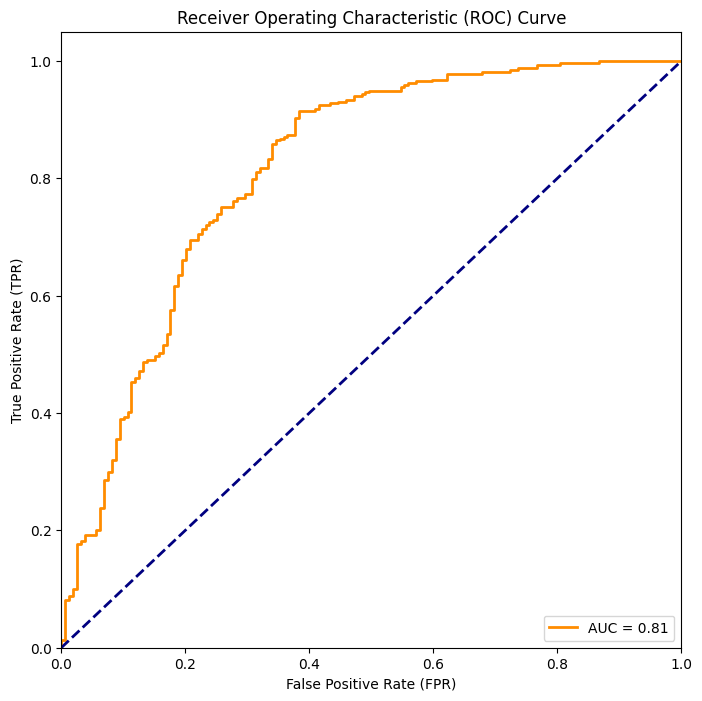

In [92]:
# Predict probabilities
y_probs = gbc.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# **XGB Boost**

In [99]:
from xgboost import XGBClassifier
params = {
        "n_estimators": [50,100,150,200],
        "max_depth" : [3, 4, 5, 7],
        "learning_rate": [0.1, 0.2, 0.3],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        }
xgb = XGBClassifier(objective='multi:softmax', num_class=20, silent=True)
grid_search = GridSearchCV(
    xgb,
    params,
    scoring='f1',
    n_jobs=-1,
    cv=3,
    verbose=2
)

In [100]:
#fitting the model and checking runtime
start = dt.datetime.now()
grid_search.fit(X_sm, y_sm)
end = dt.datetime.now()
print(f"Time taken for fits : {end - start}")

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:27:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Time taken for fits : 0:08:32.762241


              precision    recall  f1-score   support

           0       0.70      0.58      0.63       159
           1       0.81      0.88      0.84       318

    accuracy                           0.78       477
   macro avg       0.75      0.73      0.74       477
weighted avg       0.77      0.78      0.77       477



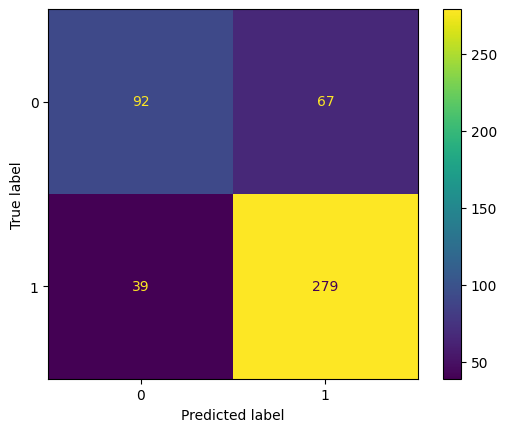

In [101]:
y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_).plot()

From above above classification report using XGBOOST classifier we observed

**Precision:**

--For the non-churn class (0), the precision is 0.70. This means that out of all instances predicted as non-churn, 70% are actually non-churn.

--For the churn class (1), the precision is 0.81. This indicates that out of all instances predicted as churn, 81% are actually churn.

**Recall:**

--For the non-churn class (0), the recall is 0.58. This means that out of all actual non-churn instances, 58% are correctly classified as non-churn.

--For the churn class (1), the recall is 0.88. This indicates that out of all actual churn instances, 88% are correctly classified as churn.

**F1-Score:**

--For the non-churn class (0), the F1-score is 0.63.

--For the churn class (1), the F1-score is 0.84.

**Accuracy:**

The overall accuracy of the model is 0.78, meaning that the model correctly predicts the class (either churn or non-churn) 78% of the time.

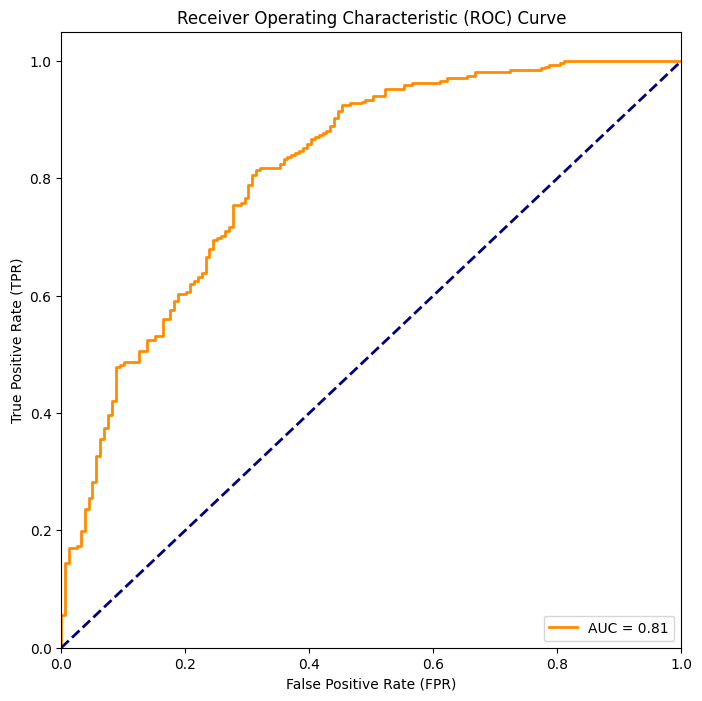

In [104]:
# Predict probabilities
y_prob = grid_search.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# **INSIGHTS:**

**Insights from Plots:**

**Gender:**Males have higher churn rates.

**Education Level:**No significant difference in churn rates among education levels.

**Joining Designations:**Designations 1, 2, and 3 show higher churn rates.

**Grades:**Grades 1, 2, and 3 have higher churn rates; grades 4 and 5 have lower churn.

**Quarterly Rating Increased:**Increased ratings (1) associated with lower churn.

**Income Increased:**Employees with increased income show lower churn rates.

**Age:**Higher churn among younger drivers (20-30), lower among older drivers (50+).

**Income:**Lower income linked to higher churn.

**Total Business Value:**Lower total business value associated with higher churn.

**Correlations:**Strong correlation between "Grade" and "Income."
Correlation between "Joining Designation" and "Grade."

**Model Performance:**

**Random Forest:**

Precision: 0.74 (non-churn), 0.82 (churn)

Recall: 0.60 (non-churn), 0.90 (churn)

F1-Score: 0.67 (non-churn), 0.86 (churn)

Accuracy: 0.80

**Gradient Boosting:**

Precision: 0.74 (non-churn), 0.83 (churn)

Recall: 0.62 (non-churn), 0.89 (churn)

F1-Score: 0.68 (non-churn), 0.86 (churn)

Accuracy: 0.80

**XGBoost:**

Precision: 0.70 (non-churn), 0.81 (churn)

Recall: 0.58 (non-churn), 0.88 (churn)

F1-Score: 0.63 (non-churn), 0.84 (churn)

Accuracy: 0.78

**RECOMMENDATIONS:**

**Address Male Churn:**Investigate and mitigate factors causing higher churn among males.

**Focus on Designations 1-3:**Address challenges for employees in Joining Designations 1, 2, and 3.

**Recognition for Performance:**Implement rewards for improved quarterly ratings.

**Financial Well-being:**Encourage salary growth and address concerns about unchanged incomes.

**Engage Young Workforce:**Develop strategies for retaining and engaging younger employees.

**Correlated Factors:**Align salary adjustments with career growth.
Address concerns related to correlated factors like "Joining Designation" and "Grade."

**Regular Monitoring:**Continuously monitor indicators and adapt strategies accordingly.

**Model Optimization:**
Choose the model (Random Forest, Gradient Boosting, XGBoost) aligning with goals.
Regularly assess and refine the model for optimal performance.